In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm    #import statsmodels for the stats models
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('OnlineNewsPopularity.csv')
df.rename(columns=lambda x: x.strip(), inplace=True)

In [3]:
df.columns.values

array(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words'

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10d06bb70>]], dtype=object)

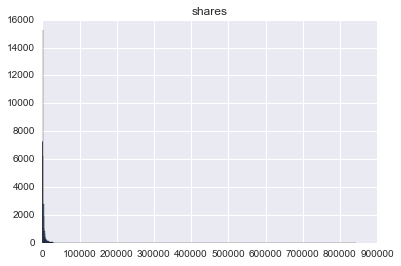

In [6]:
df.hist('shares', bins =1000)

In [7]:
df.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [4]:
morethan1400 = []
for row in df['shares']:
    if row > 1400:
        morethan1400.append(1)
    else:
        morethan1400.append(0)
df['morethan1400']= morethan1400

In [9]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,morethan1400
0,http://mashable.com/2013/01/07/amazon-instant-...,731,12,219,0.663594,1,0.815385,4,2,1,...,0.700000,-0.350000,-0.600000,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731,9,255,0.604743,1,0.791946,3,1,1,...,0.700000,-0.118750,-0.125000,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731,9,211,0.575130,1,0.663866,3,1,1,...,1.000000,-0.466667,-0.800000,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731,9,531,0.503788,1,0.665635,9,0,1,...,0.800000,-0.369697,-0.600000,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731,13,1072,0.415646,1,0.540890,19,19,20,...,1.000000,-0.220192,-0.500000,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
5,http://mashable.com/2013/01/07/beewi-smart-toys/,731,10,370,0.559889,1,0.698198,2,2,0,...,0.600000,-0.195000,-0.400000,-0.100000,0.642857,0.214286,0.142857,0.214286,855,0
6,http://mashable.com/2013/01/07/bodymedia-armba...,731,8,960,0.418163,1,0.549834,21,20,20,...,1.000000,-0.224479,-0.500000,-0.050000,0.000000,0.000000,0.500000,0.000000,556,0
7,http://mashable.com/2013/01/07/canon-poweshot-n/,731,12,989,0.433574,1,0.572108,20,20,20,...,1.000000,-0.242778,-0.500000,-0.050000,1.000000,0.500000,0.500000,0.500000,891,0
8,http://mashable.com/2013/01/07/car-of-the-futu...,731,11,97,0.670103,1,0.836735,2,0,0,...,0.800000,-0.125000,-0.125000,-0.125000,0.125000,0.000000,0.375000,0.000000,3600,1
9,http://mashable.com/2013/01/07/chuck-hagel-web...,731,10,231,0.636364,1,0.797101,4,1,1,...,0.500000,-0.238095,-0.500000,-0.100000,0.000000,0.000000,0.500000,0.000000,710,0


In [5]:
class_df = df.set_index('url')

In [11]:
class_df.columns.values

array(['timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg',
       'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares',
       'self_reference_max_shares', 'self_reference_avg_sharess',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02',
       'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [6]:
y = class_df['morethan1400']
X = class_df.drop(['shares','timedelta','morethan1400'], axis=1)



In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)

In [16]:
kneighbordict = {}
for i in range(20, 31):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)
    score = accuracy_score(y_test, y_predict)
    kneighbordict[i]=score
print (kneighbordict)
max(kneighbordict, key=kneighbordict.get)

{20: 0.5791155204304691, 21: 0.58273078863292416, 22: 0.57701362031276271, 23: 0.58231040860938288, 24: 0.57869514040692782, 25: 0.5818900285858416, 26: 0.58020850849167649, 27: 0.58197410459054988, 28: 0.58004035648225993, 29: 0.58407600470825627, 30: 0.58062888851521777}


29

In [17]:
logisticmodel = LogisticRegression()
logisticmodel = logisticmodel.fit(X_train, y_train)
logisticpredict = logisticmodel.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logisticpredict)
print(logistic_accuracy)


0.596014797377


In [40]:

def modelaccuracy(alg):
    model = alg
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('model: ' + str(alg) + ' Accuracy: ' + str(accuracy))

In [19]:
modelaccuracy(GaussianNB())

model: GaussianNB() Accuracy: 0.532285185808


In [24]:
modelaccuracy(SVC())

model: SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) Accuracy: 0.503363040188


In [20]:
modelaccuracy(DecisionTreeClassifier())

model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best') Accuracy: 0.572221288044


In [59]:
modelaccuracy(RandomForestClassifier(n_estimators=500))

model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) Accuracy: 0.66125777703


In [8]:
estimators = []
accuracylist = []
for i in range(0,501, 50):
    if i == 0:
        i=1
    model = RandomForestClassifier(n_estimators=i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print (str(i)+ ': '+str(accuracy))
    accuracylist.append(accuracy)
    estimators.append(i)

1: 0.574155036153
50: 0.650664200437
100: 0.656297292753
150: 0.658651420884
200: 0.66142592904
250: 0.664032285186
300: 0.661341853035
350: 0.663611905162
400: 0.659660332941
450: 0.661341853035
500: 0.66125777703


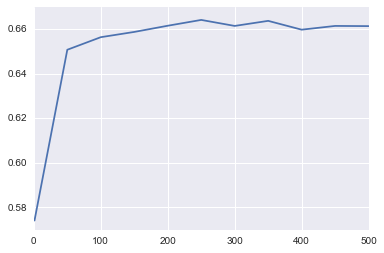

In [9]:
plt.plot(estimators, accuracylist)

In [11]:
max_features = []
max_feataccuracylist = []
for i in range(5, 58, 5):
    model = RandomForestClassifier(n_estimators=200, max_features=i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print (str(i)+ ': '+str(accuracy))
    max_feataccuracylist.append(accuracy)
    max_features.append(i)

5: 0.664368589205
10: 0.658819572894
15: 0.659912560955
20: 0.655204304691
25: 0.658903648899
30: 0.653859088616
35: 0.661846309063
40: 0.659744408946
45: 0.656381368757
50: 0.657390280814
55: 0.658651420884


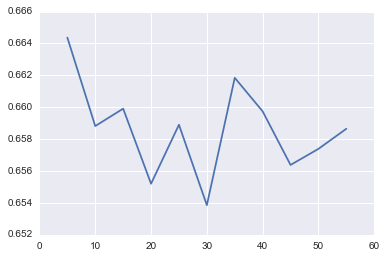

In [12]:
plt.plot(max_features, max_feataccuracylist)

In [13]:
min_sample_leaf= []
min_sample_leaf_accuracylist = []
for i in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators=200, min_samples_leaf=i)
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print (str(i)+ ': '+str(accuracy))
    min_sample_leaf_accuracylist.append(accuracy)
    min_sample_leaf.append(i)


1: 0.664620817219
11: 0.662602993106
21: 0.659912560955
31: 0.659744408946
41: 0.656129140743
51: 0.65570876072
61: 0.658651420884
71: 0.656213216748
81: 0.6571380528
91: 0.656633596771


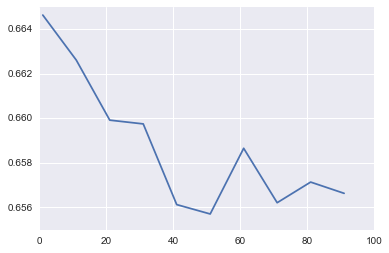

In [14]:
plt.plot(min_sample_leaf, min_sample_leaf_accuracylist)

In [15]:
model = RandomForestClassifier(n_estimators=200, min_samples_leaf=1, max_features = 5)
model = model.fit(X_train, y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test, y_predict)
print (str(accuracy))

0.663527829158


In [77]:
len(names)

58

In [48]:
from sklearn.cross_validation import cross_val_score
import numpy as np
def meanCVscore(estimator, X, y):
    scores = cross_val_score(estimator, X, y)
    mean = np.mean(scores)
    print('model: ' + str(estimator), ' Mean Accuacy: ' + str(mean))

In [51]:
meanCVscore(RandomForestClassifier(n_estimators=200), X, y)

model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)  Mean Accuacy: 0.650212485361


In [57]:
logisticmodel = LogisticRegression()
logisticmodel = logisticmodel.fit(X_train, y_train) 
y_pred = logisticmodel.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print ('accuracy:', accuracy ,'\n')
print ("Coefficients:")
coefs = [logisticmodel.intercept_[0]]
for coef in logisticmodel.coef_[0]:
    coefs.append(coef)  
print ('Intercept:', coefs[0])
for i in range(1,len(coefs)):
    
    print (str(names[i]) + ': ' + str(coefs[i]))

accuracy: 0.596014797377 

Coefficients:
Intercept: -2.89242013305e-05
n_tokens_content: -0.000407273796554
n_unique_tokens: 0.000222803692177
n_non_stop_words: 2.45032439413e-05
n_non_stop_unique_tokens: 4.2537318276e-05
num_hrefs: 1.69203158045e-05
num_self_hrefs: 0.000579491403943
num_imgs: 3.0352885717e-05
num_videos: 9.02223413293e-05
average_token_length: -0.000220521710912
num_keywords: -0.00015802227937
data_channel_is_lifestyle: -4.48739507193e-05
data_channel_is_entertainment: 4.40908515349e-06
data_channel_is_bus: -8.82785132726e-05
data_channel_is_socmed: 1.51677183735e-05
data_channel_is_tech: 4.17146000613e-05
data_channel_is_world: 7.80178101175e-05
kw_min_min: -7.2030559443e-05
kw_max_min: -0.0024302133669
kw_avg_min: 3.86011793723e-05
kw_min_max: -0.000287088929748
kw_max_max: -2.31582956143e-07
kw_avg_max: -1.74659423764e-06
kw_min_avg: -1.26362680208e-06
kw_max_avg: -6.93543197523e-05
kw_avg_avg: -8.31857166131e-05
self_reference_min_shares: 0.000681930246999
self_re

IndexError: list index out of range

In [54]:
names

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',

In [25]:
def modelaccuracy(alg, X_train, X_test, y_train, y_test):
    model = alg
    model = model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    print('Accuracy: ' + str(accuracy))
    print(classification_report(y_test, y_predict))
    

print ('Model: KNN')
modelaccuracy(KNeighborsClassifier(n_neighbors=29), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Logistic Regression')
modelaccuracy(LogisticRegression(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Gaussian NB')
modelaccuracy(GaussianNB(), X_train, X_test, y_train, y_test) 
print('\n')
# print ('Model: SVC')
# modelaccuracy(SVC(), X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Decision Tree')
modelaccuracy(DecisionTreeClassifier(),X_train, X_test, y_train, y_test)
print('\n')
print ('Model: Random Forest')
modelaccuracy(RandomForestClassifier(), X_train, X_test, y_train, y_test)

In [33]:
names = list(X.columns.values)


In [86]:
names

['n_tokens_title',
 'n_tokens_content',
 'n_unique_tokens',
 'n_non_stop_words',
 'n_non_stop_unique_tokens',
 'num_hrefs',
 'num_self_hrefs',
 'num_imgs',
 'num_videos',
 'average_token_length',
 'num_keywords',
 'data_channel_is_lifestyle',
 'data_channel_is_entertainment',
 'data_channel_is_bus',
 'data_channel_is_socmed',
 'data_channel_is_tech',
 'data_channel_is_world',
 'kw_min_min',
 'kw_max_min',
 'kw_avg_min',
 'kw_min_max',
 'kw_max_max',
 'kw_avg_max',
 'kw_min_avg',
 'kw_max_avg',
 'kw_avg_avg',
 'self_reference_min_shares',
 'self_reference_max_shares',
 'self_reference_avg_sharess',
 'weekday_is_monday',
 'weekday_is_tuesday',
 'weekday_is_wednesday',
 'weekday_is_thursday',
 'weekday_is_friday',
 'weekday_is_saturday',
 'weekday_is_sunday',
 'is_weekend',
 'LDA_00',
 'LDA_01',
 'LDA_02',
 'LDA_03',
 'LDA_04',
 'global_subjectivity',
 'global_sentiment_polarity',
 'global_rate_positive_words',
 'global_rate_negative_words',
 'rate_positive_words',
 'rate_negative_words',